In [333]:
# imports
from pathlib import Path
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
import joblib


In [259]:
# inlezen dataset recepten
df_recipes = pd.read_csv("./Datasets/recipes.csv", converters={"nutrition": pd.eval})
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [260]:
# Which cuisine
df_recipes["tags"]

0         ['60-minutes-or-less', 'time-to-make', 'course...
1         ['30-minutes-or-less', 'time-to-make', 'course...
2         ['time-to-make', 'course', 'preparation', 'mai...
3         ['60-minutes-or-less', 'time-to-make', 'course...
4         ['weeknight', 'time-to-make', 'course', 'main-...
                                ...                        
231632    ['ham', '60-minutes-or-less', 'time-to-make', ...
231633    ['15-minutes-or-less', 'time-to-make', 'course...
231634    ['60-minutes-or-less', 'time-to-make', 'course...
231635    ['30-minutes-or-less', 'time-to-make', 'course...
231636    ['30-minutes-or-less', 'time-to-make', 'course...
Name: tags, Length: 231637, dtype: object

In [261]:
select_indices_tags = list(np.where(df_recipes.loc[:,"tags"]))[0]
select_indices_tags

array([     0,      1,      2, ..., 231634, 231635, 231636], dtype=int64)

In [262]:
df_recipes["Vegetarian"] = ""

In [263]:
for j in select_indices_tags:
    try:
        vegetarian = re.search('vegetarian' or 'vegan', df_recipes.loc[j,"tags"]).group(0)
        df_recipes.loc[j, "Vegetarian"] = vegetarian

    except AttributeError:
        pass

In [264]:
df_recipes["Cuisine"] = ""
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Vegetarian,Cuisine
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,vegetarian,
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,,
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,,
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,,
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,vegetarian,


In [265]:
for i in select_indices_tags:
    try:
        asian = re.search('asian' or 'chinese' or 'japanese' or 'korean' or 'indonesian' or 'malaysian' or 'pakistani' or 'singaporean' or 'indian' or 'thai' or 'vietnamese', df_recipes.loc[i,"tags"]).group(0)
        df_recipes.loc[i, "Cuisine"] = asian
    except AttributeError:
        pass
    try:
        european = re.search('european' or 'austrian' or 'german' or 'hungarian' or 'czech' or 'polish' or 'slovenian' or 'swiss' or 'russian' or 'romanian' or 'bulgarian' or 'ukrainian' or 'british' or 'english' or 'irish' or 'scottish' or 'danish' or 'finnish' or 'icelandic' or 'norwegian' or 'swedish' or 'greek' or 'turkish' or 'croatian' or 'portuguese' or 'spanish' or 'belgian' or 'dutch' or 'french', df_recipes.loc[i,"tags"]).group(0)
        df_recipes.loc[i, "Cuisine"] = european
    except AttributeError:
        pass
    try:
        african = re.search('african' or 'ethiopian' or 'ugandan' or 'algerian' or 'egyptian' or 'mauritanian' or 'south-african' or 'nigerian', df_recipes.loc[i,"tags"]).group(0)
        df_recipes.loc[i, "Cuisine"] = african
    except AttributeError:
        pass
    try:
        american = re.search('american' or 'canadian' or 'mexican' or 'argentinian' or 'brazilian' or 'chilean' or 'hawaiian' or 'colombian' or 'cuban' or 'curacao' or 'dominica' or 'jamaican', df_recipes.loc[i,"tags"]).group(0)
        df_recipes.loc[i, "Cuisine"] = american
    except AttributeError:
        pass
    try:
        oceanic = re.search('oceanic' or 'australian' or 'new zealand', df_recipes.loc[i,"tags"]).group(0)
        df_recipes.loc[i, "Cuisine"] = oceanic
    except AttributeError:
        pass


In [266]:
def convert_cuisine(row):
    if row == "":
        return 0 # "undefined"
    if row == "american":
        return 1 # "american"
    if row == "european":
        return 2 # "european"
    if row == "asian":
        return 3 # "asian"
    if row == "african":
        return 4 # "african"



In [267]:
df_recipes["Cuisine"] = df_recipes['Cuisine'].apply(convert_cuisine)

# df_recipes_cuisine = pd.get_dummies(df_recipes[["Cuisine"]])

In [268]:
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Vegetarian,Cuisine
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,vegetarian,1
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,,1
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,,0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,,0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,vegetarian,1


In [269]:
df_recipes["Cuisine"].value_counts()

0    145252
1     49532
2     21743
3     12384
4      2726
Name: Cuisine, dtype: int64

In [270]:
def convert_vegetarian(row):
    if row == "":
        return "undefined"
    if row == "vegetarian":
        return "vegetarian"

In [271]:
df_recipes["Vegetarian"] = df_recipes['Vegetarian'].apply(convert_vegetarian)

In [272]:
df_recipes["Vegetarian"].value_counts()

undefined     195986
vegetarian     35651
Name: Vegetarian, dtype: int64

In [273]:
def convert_minutes(row):
    if row <= 30:
        return 0 # "30 minutes"
    if 30 < row <= 60:
        return 1 # "30 to 60 minutes"
    if 60 < row <= 120:
        return 2 # "60 to 120 minutes"
    if 120 < row <= 180:
        return 3 # "120 to 180 minutes"
    if row > 180:
        return 4 # "over 180 minutes"

In [274]:
df_recipes["minutes"] = df_recipes['minutes'].apply(convert_minutes)

# df_minutes = pd.get_dummies(df_recipes[["minutes"]])

In [275]:
df_recipes["minutes"].value_counts()

0    99053
1    70077
2    36683
4    17388
3     8436
Name: minutes, dtype: int64

In [276]:
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Vegetarian,Cuisine
0,arriba baked winter squash mexican style,137739,1,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,vegetarian,1
1,a bit different breakfast pizza,31490,0,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,undefined,1
2,all in the kitchen chili,112140,3,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,undefined,0
3,alouette potatoes,59389,1,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,undefined,0
4,amish tomato ketchup for canning,44061,4,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,vegetarian,1


# Health goals (macros mostly)

In [277]:
df_recipes.nutrition.tolist()

[array([51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0], dtype=object),
 array([173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0], dtype=object),
 array([269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0], dtype=object),
 array([368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0], dtype=object),
 array([352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0], dtype=object),
 array([160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0], dtype=object),
 array([380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0], dtype=object),
 array([1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0], dtype=object),
 array([4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 220.0], dtype=object),
 array([2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0], dtype=object),
 array([79.2, 3.0, 58.0, 0.0, 0.0, 6.0, 5.0], dtype=object),
 array([734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0], dtype=object),
 array([462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0], dtype=object),
 array([315.8, 0.0, 202.0, 9.0, 6.0, 0.0, 21.0], dtype=object),
 array([8.2, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], dtype=object),
 array([105

In [278]:
df_recipes[['Calories (#)', 'Total Fat (PDV)', 'Sugar (PDV)', 'Sodium (PDV)', 'Protein (PDV)', 'Saturated Fat (PDV)', 'Carbohydrates (PDV)']] = pd.DataFrame(df_recipes.nutrition.tolist(), index= df_recipes.index)
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,n_ingredients,Vegetarian,Cuisine,Calories (#),Total Fat (PDV),Sugar (PDV),Sodium (PDV),Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,1,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,7,vegetarian,1,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,0,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,6,undefined,1,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,3,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,13,undefined,0,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,1,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,11,undefined,0,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,4,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,8,vegetarian,1,352.9,1.0,337.0,23.0,3.0,0.0,28.0


## Normal diet

### Balanced

In [279]:
indices_normal_balanced = list(np.where((df_recipes['Calories (#)'] >= 300) & (df_recipes['Calories (#)'] <= 800) & (df_recipes['Total Fat (PDV)'] >= 10) & (df_recipes['Total Fat (PDV)'] <= 15) & (df_recipes['Saturated Fat (PDV)'] <= 15) & (df_recipes['Protein (PDV)'] >= 10) & (df_recipes['Carbohydrates (PDV)'] >= 10) & (df_recipes['Carbohydrates (PDV)'] <= 20)))[0]

In [280]:
len(indices_normal_balanced)

2015

In [281]:
df_recipes_cat = df_recipes
df_recipes_cat["Category"] = 300

for index in indices_normal_balanced:
    if df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 0
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 1
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 2
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 3
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 4
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 5
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 6
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 7
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 8
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 9
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 10
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 11
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 12
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 13
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 14
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 15
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 16
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 17
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 18
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 19
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 20
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 21
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 22
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 23
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 24

### Gaining muscle (Calorie surplus)

In [282]:
indices_normal_gains = list(np.where((df_recipes['Calories (#)'] >= 500) & (df_recipes['Calories (#)'] <= 1200) & (df_recipes['Total Fat (PDV)'] >= 15) & (df_recipes['Total Fat (PDV)'] <= 25) & (df_recipes['Saturated Fat (PDV)'] <= 20) & (df_recipes['Protein (PDV)'] >= 20) & (df_recipes['Carbohydrates (PDV)'] >= 30) & (df_recipes['Carbohydrates (PDV)'] <= 60)))[0]

In [283]:
len(indices_normal_gains)

608

In [284]:
for index in indices_normal_gains:
    if df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 25
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 26
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 27
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 28
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 29
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 30
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 31
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 32
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 33
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 34
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 35
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 36
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 37
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 38
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 39
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 40
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 41
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 42
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 43
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 44
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 45
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 46
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 47
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 48
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 49

### Losing fat (Calorie deficit)

In [285]:
indices_normal_losing = list(np.where((df_recipes['Calories (#)'] >= 300) & (df_recipes['Calories (#)'] <= 600) & (df_recipes['Total Fat (PDV)'] >= 7.5) & (df_recipes['Total Fat (PDV)'] <= 15) & (df_recipes['Saturated Fat (PDV)'] <= 20) & (df_recipes['Protein (PDV)'] >= 25) & (df_recipes['Carbohydrates (PDV)'] >= 10) & (df_recipes['Carbohydrates (PDV)'] <= 30)))[0]

In [286]:
len(indices_normal_losing)

3413

In [287]:
for index in indices_normal_losing:
    if df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 50
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 51
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 52
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 53
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 54
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 55
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 56
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 57
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 58
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 59
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 60
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 61
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 62
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 63
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 64
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 65
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 66
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 67
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 68
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 69
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 70
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 71
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 72
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 73
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 74

## Keto diet

### Balanced

In [288]:
indices_keto_balanced = list(np.where((df_recipes['Calories (#)'] >= 300) & (df_recipes['Calories (#)'] <= 800) & (df_recipes['Total Fat (PDV)'] >= 30) & (df_recipes['Total Fat (PDV)'] <= 35) & (df_recipes['Saturated Fat (PDV)'] <= 15) & (df_recipes['Protein (PDV)'] >= 10) & (df_recipes['Carbohydrates (PDV)'] <= 5)))[0]

In [289]:
len(indices_keto_balanced)

78

In [290]:
for index in indices_keto_balanced:
    if df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 75
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 76
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 77
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 78
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 79
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 80
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 81
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 82
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 83
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 84
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 85
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 86
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 87
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 88
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 89
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 90
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 91
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 92
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 93
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 94
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 95
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 96
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 97
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 98
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 99

### Gaining muscle (Calorie surplus)

In [291]:
indices_keto_gains = list(np.where((df_recipes['Calories (#)'] >= 500) & (df_recipes['Calories (#)'] <= 1200) & (df_recipes['Total Fat (PDV)'] >= 45) & (df_recipes['Total Fat (PDV)'] <= 55) & (df_recipes['Saturated Fat (PDV)'] <= 20) & (df_recipes['Protein (PDV)'] >= 20) & (df_recipes['Carbohydrates (PDV)'] <= 5)))[0]

In [292]:
len(indices_keto_gains)

2

In [293]:
for index in indices_keto_gains:
    if df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 100
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 101
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 102
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 103
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 104
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 105
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 106
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 107
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 108
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 109
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 110
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 111
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 112
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 113
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 114
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 115
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 116
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 117
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 118
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 119
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 120
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 121
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 122
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 123
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 124

### Losing Fat (Calorie deficit)

In [294]:
indices_keto_losing = list(np.where((df_recipes['Calories (#)'] >= 300) & (df_recipes['Calories (#)'] <= 600) & (df_recipes['Total Fat (PDV)'] >= 22.5) & (df_recipes['Total Fat (PDV)'] <= 30) & (df_recipes['Saturated Fat (PDV)'] <= 20) & (df_recipes['Protein (PDV)'] >= 25) & (df_recipes['Carbohydrates (PDV)'] <= 5)))[0]

In [295]:
len(indices_keto_losing)

489

In [296]:
for index in indices_keto_losing:
    if df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 125
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 126
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 127
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 128
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 129
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 130
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 131
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 132
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 133
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 134
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 135
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 136
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 137
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 138
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 139
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 140
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 141
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 142
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 143
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 144
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 145
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 146
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 147
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 148
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 149

## Vegetarian diet

In [297]:
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,Vegetarian,Cuisine,Calories (#),Total Fat (PDV),Sugar (PDV),Sodium (PDV),Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),Category
0,arriba baked winter squash mexican style,137739,1,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,vegetarian,1,51.5,0.0,13.0,0.0,2.0,0.0,4.0,300
1,a bit different breakfast pizza,31490,0,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,undefined,1,173.4,18.0,0.0,17.0,22.0,35.0,1.0,300
2,all in the kitchen chili,112140,3,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,undefined,0,269.8,22.0,32.0,48.0,39.0,27.0,5.0,300
3,alouette potatoes,59389,1,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,undefined,0,368.1,17.0,10.0,2.0,14.0,8.0,20.0,300
4,amish tomato ketchup for canning,44061,4,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,vegetarian,1,352.9,1.0,337.0,23.0,3.0,0.0,28.0,300


### Balanced

In [298]:
indices_vegetarian_balanced = list(np.where((df_recipes["Vegetarian"] == "vegetarian") & (df_recipes['Calories (#)'] >= 300) & (df_recipes['Calories (#)'] <= 800) & (df_recipes['Total Fat (PDV)'] >= 10) & (df_recipes['Total Fat (PDV)'] <= 15) & (df_recipes['Saturated Fat (PDV)'] <= 15) & (df_recipes['Protein (PDV)'] >= 10) & (df_recipes['Carbohydrates (PDV)'] >= 10) & (df_recipes['Carbohydrates (PDV)'] <= 20)))[0]

In [299]:
len(indices_vegetarian_balanced)

340

In [300]:
for index in indices_vegetarian_balanced:
    if df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 150
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 151
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 152
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 153
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 154
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 155
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 156
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 157
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 158
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 159
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 160
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 161
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 162
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 163
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 164
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 165
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 166
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 167
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 168
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 169
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 170
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 171
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 172
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 173
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 174

### Gaining muscle (Calorie surplus)

In [301]:
indices_vegetarian_gains = list(np.where((df_recipes["Vegetarian"] == "vegetarian") & (df_recipes['Calories (#)'] >= 500) & (df_recipes['Calories (#)'] <= 1200) & (df_recipes['Total Fat (PDV)'] >= 15) & (df_recipes['Total Fat (PDV)'] <= 25) & (df_recipes['Saturated Fat (PDV)'] <= 20) & (df_recipes['Protein (PDV)'] >= 20) & (df_recipes['Carbohydrates (PDV)'] >= 30) & (df_recipes['Carbohydrates (PDV)'] <= 60)))[0]

In [302]:
len(indices_vegetarian_gains)

190

In [303]:
for index in indices_vegetarian_gains:
    if df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 175
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 176
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 177
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 178
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 179
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 180
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 181
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 182
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 183
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 184
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 185
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 186
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 187
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 188
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 189
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 190
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 191
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 192
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 193
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 194
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 195
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 196
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 197
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 198
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 199

### Losing fat (Calorie deficit)

In [304]:
indices_vegetarian_losing = list(np.where((df_recipes["Vegetarian"] == "vegetarian") & (df_recipes['Calories (#)'] >= 300) & (df_recipes['Calories (#)'] <= 600) & (df_recipes['Total Fat (PDV)'] >= 7.5) & (df_recipes['Total Fat (PDV)'] <= 15) & (df_recipes['Saturated Fat (PDV)'] <= 20) & (df_recipes['Protein (PDV)'] >= 25) & (df_recipes['Carbohydrates (PDV)'] >= 10) & (df_recipes['Carbohydrates (PDV)'] <= 30)))[0]

In [305]:
len(indices_vegetarian_losing)

557

In [306]:
for index in indices_vegetarian_losing:
    if df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 200
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 201
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 202
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 203
    elif df_recipes.loc[index,"Cuisine"] == 0 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 204
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 205
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 206
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 207
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 208
    elif df_recipes.loc[index,"Cuisine"] == 1 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 209
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 210
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 211
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 212
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 213
    elif df_recipes.loc[index,"Cuisine"] == 2 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 214
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 215
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 216
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 217
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 218
    elif df_recipes.loc[index,"Cuisine"] == 3 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 219
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 0:
        df_recipes_cat.loc[index,"Category"] = 220
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 1:
        df_recipes_cat.loc[index,"Category"] = 221
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 2:
        df_recipes_cat.loc[index,"Category"] = 222
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 3:
        df_recipes_cat.loc[index,"Category"] = 223
    elif df_recipes.loc[index,"Cuisine"] == 4 and df_recipes.loc[index,"minutes"] == 4:
        df_recipes_cat.loc[index,"Category"] = 224

In [307]:
df_recipes = df_recipes[df_recipes["Category"] != 300 ]

In [308]:
df_recipes["Diet"] = 10

for i in indices_normal_balanced:
    df_recipes.loc[i,"Health Goals"] = 0 # "balanced"

for j in indices_normal_gains:
    df_recipes.loc[j,"Health Goals"] = 1 # "muscle gain"

for k in indices_normal_losing:
    df_recipes.loc[k,"Health Goals"] = 2 # "losing fat"

for l in indices_keto_balanced:
    df_recipes.loc[l,"Health Goals"] = 0 # "balanced"

for m in indices_keto_gains:
    df_recipes.loc[m,"Health Goals"] = 1 # "muscle gain"

for n in indices_keto_losing:
    df_recipes.loc[n,"Health Goals"] = 2 # "losing fat"

for o in indices_vegetarian_balanced:
    df_recipes.loc[o,"Health Goals"] = 0 # "balanced"

for p in indices_vegetarian_gains:
    df_recipes.loc[p,"Health Goals"] = 1 # "muscle gain"

for q in indices_vegetarian_losing:
    df_recipes.loc[q,"Health Goals"] = 2 # "losing fat"

df_recipes = df_recipes[df_recipes["Health Goals"] != 10 ]

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_45016\3085394207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes["Diet"] = 10
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_45016\3085394207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes.loc[i,"Health Goals"] = 0 # "balanced"


In [309]:
df_recipes["Diet"] = 10

for i in indices_normal_balanced:
    df_recipes.loc[i,"Diet"] = 0 # "normal"

for j in indices_normal_gains:
    df_recipes.loc[j,"Diet"] = 0 # "normal"

for k in indices_normal_losing:
    df_recipes.loc[k,"Diet"] = 0 # "normal"

for l in indices_keto_balanced:
    df_recipes.loc[l,"Diet"] = 1 # "keto"

for m in indices_keto_gains:
    df_recipes.loc[m,"Diet"] = 1 # "keto"

for n in indices_keto_losing:
    df_recipes.loc[n,"Diet"] = 1 # "keto"

for o in indices_vegetarian_balanced:
    df_recipes.loc[o,"Diet"] = 2 # "vegetarian"

for p in indices_vegetarian_gains:
    df_recipes.loc[p,"Diet"] = 2 # "vegetarian"

for q in indices_vegetarian_losing:
    df_recipes.loc[q,"Diet"] = 2 # "vegetarian"

df_recipes = df_recipes[df_recipes["Diet"] != 10 ]
# df_health_goals = pd.get_dummies(df_recipes[["Diet_&_Health_Goals"]])

# Features & Correlations

In [310]:
df_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,Calories (#),Total Fat (PDV),Sugar (PDV),Sodium (PDV),Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),Category,Diet,Health Goals
22,crispy crunchy chicken,83873,1,108291,2004-02-13,"['60-minutes-or-less', 'time-to-make', 'course...","[335.8, 11.0, 2.0, 24.0, 64.0, 10.0, 10.0]",8,"['combine soup , egg and seasoned salt in a bo...","delicious, crunchy fried chicken. this recipe ...",...,335.8,11.0,2.0,24.0,64.0,10.0,10.0,51,0,2.0
60,mexican pasta,60219,0,76846,2003-04-18,"['30-minutes-or-less', 'time-to-make', 'course...","[325.3, 10.0, 11.0, 39.0, 26.0, 17.0, 17.0]",5,"['boil pasta as directed on package', 'drain a...",made this as a side dish for mexican meatballs...,...,325.3,10.0,11.0,39.0,26.0,17.0,17.0,55,0,2.0
163,california roll salad,318677,0,334242,2008-08-11,"['15-minutes-or-less', 'time-to-make', 'course...","[455.7, 13.0, 38.0, 72.0, 34.0, 6.0, 26.0]",8,"['prepare rice according to directions', 'pour...",this is a great light salad that can be your m...,...,455.7,13.0,38.0,72.0,34.0,6.0,26.0,50,0,2.0
227,leftover lo mein for two,221049,0,356062,2007-04-06,"['15-minutes-or-less', 'time-to-make', 'course...","[302.6, 9.0, 8.0, 18.0, 36.0, 8.0, 14.0]",2,['combine everything but pasta on stove top an...,nice dish made of left overs!,...,302.6,9.0,8.0,18.0,36.0,8.0,14.0,65,0,2.0
238,middle eastern twice baked potatoes,120297,2,197023,2005-05-02,"['time-to-make', 'course', 'main-ingredient', ...","[327.6, 11.0, 16.0, 14.0, 21.0, 6.0, 18.0]",14,"['preheat the oven to 200c', 'wash the potatoe...",a delicious yet low-fat twice-baked potato sid...,...,327.6,11.0,16.0,14.0,21.0,6.0,18.0,167,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231057,zucchini buffalo chili,227140,2,497465,2007-05-10,"['lactose', 'time-to-make', 'course', 'main-in...","[350.0, 11.0, 62.0, 66.0, 66.0, 6.0, 14.0]",8,"['heat a large soup pot over medium heat', 'ad...",last summer we were drowning in round french z...,...,350.0,11.0,62.0,66.0,66.0,6.0,14.0,57,0,2.0
231069,zucchini carbonara for two vegetarian,293301,0,37449,2008-03-21,"['30-minutes-or-less', 'time-to-make', 'course...","[486.9, 15.0, 14.0, 5.0, 31.0, 18.0, 28.0]",10,['cook pasta in lots of boiling salted water f...,"i just got a new cookbook, good cooking by jil...",...,486.9,15.0,14.0,5.0,31.0,18.0,28.0,210,2,2.0
231083,zucchini carrot raisin walnut bread,263811,2,559283,2007-11-07,"['time-to-make', 'course', 'main-ingredient', ...","[586.0, 19.0, 259.0, 21.0, 21.0, 9.0, 37.0]",14,"['preheat oven to 350 degrees', 'grease and fl...",lowfat,...,586.0,19.0,259.0,21.0,21.0,9.0,37.0,27,0,1.0
231594,zuppa my weight watcher version of the olive g...,328409,2,690050,2008-10-01,"['time-to-make', 'course', 'preparation', 'occ...","[342.4, 10.0, 10.0, 39.0, 48.0, 8.0, 15.0]",7,"['in a big soup pot', 'cook ground turkey with...",this is the way that i have made a low fat ve...,...,342.4,10.0,10.0,39.0,48.0,8.0,15.0,52,0,2.0


In [334]:
filepath = Path('updated_recipes.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_recipes.to_csv(filepath)

In [311]:
df_recipes_corr = df_recipes.drop(["name", "id", "contributor_id", "submitted", "tags", "nutrition", "n_steps", "steps", "description", "ingredients", "n_ingredients", "Vegetarian", "Calories (#)", "Total Fat (PDV)", "Sugar (PDV)", "Sodium (PDV)", "Protein (PDV)", "Saturated Fat (PDV)", "Carbohydrates (PDV)"], axis=1)

In [312]:
df_recipes_corr.head()

,minutes,Cuisine,Category,Diet,Health Goals
22,1,0,51,0,2.0
60,0,1,55,0,2.0
163,0,0,50,0,2.0
227,0,3,65,0,2.0
238,2,3,167,2,0.0


In [313]:
# index_id_list = list(range(len(df_recipes_corr)))
# df_recipes_corr["id"] = index_id_list
# # df_recipes_corr.index = index_id_list
# to_categorical(df_recipes_corr["id"])

<AxesSubplot:>

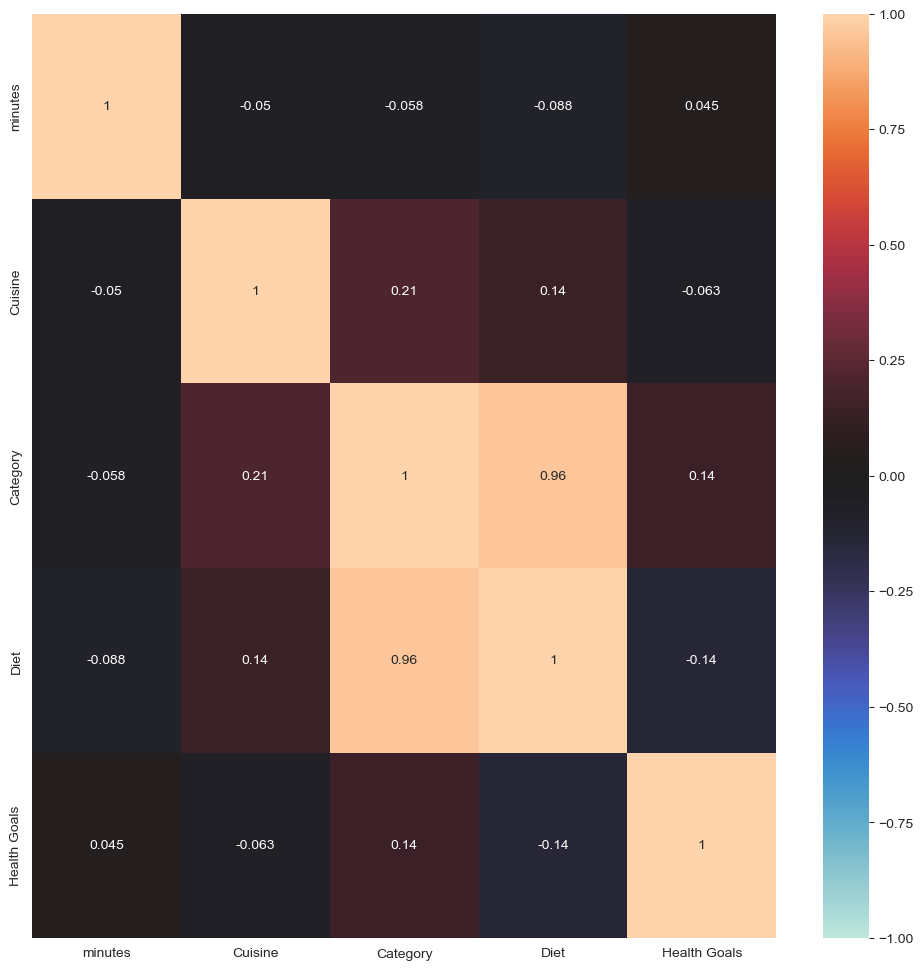

In [314]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_recipes_corr.corr(), annot = True, vmin=-1, vmax=1, center= 0, ax=ax)

In [315]:
mms = MinMaxScaler()

for i, feature in enumerate(['minutes', 'Cuisine', 'Health Goals', 'Diet']):
    df_recipes_corr[feature + ' mms'] = mms.fit_transform(df_recipes_corr[[feature]])
    df_recipes_corr = df_recipes_corr.drop(feature, axis=1)

In [316]:
X = df_recipes_corr.drop("Category", axis=1)
y_cat = to_categorical(df_recipes_corr["Category"])

X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.3, random_state=22)

In [317]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [319]:
model = Sequential()
model.add(Dense(6, input_shape=(4,), activation='tanh'))
model.add(Dense(36, activation='tanh'))
model.add(Dense(1296, activation='tanh'))
model.add(Dense(225, activation='softmax'))
model.compile(Adam(learning_rate=0.003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100,
            validation_split=0.1, batch_size=100,
            verbose=2)
history


Epoch 1/100
32/32 - 0s - loss: 3.5381 - accuracy: 0.2083 - val_loss: 2.5992 - val_accuracy: 0.3820 - 480ms/epoch - 15ms/step
Epoch 2/100
32/32 - 0s - loss: 1.9824 - accuracy: 0.4936 - val_loss: 1.5826 - val_accuracy: 0.6152 - 127ms/epoch - 4ms/step
Epoch 3/100
32/32 - 0s - loss: 1.2874 - accuracy: 0.7335 - val_loss: 1.2005 - val_accuracy: 0.7135 - 120ms/epoch - 4ms/step
Epoch 4/100
32/32 - 0s - loss: 0.9214 - accuracy: 0.8045 - val_loss: 0.9983 - val_accuracy: 0.7865 - 120ms/epoch - 4ms/step
Epoch 5/100
32/32 - 0s - loss: 0.7206 - accuracy: 0.8505 - val_loss: 0.7204 - val_accuracy: 0.8118 - 130ms/epoch - 4ms/step
Epoch 6/100
32/32 - 0s - loss: 0.6104 - accuracy: 0.8617 - val_loss: 0.7870 - val_accuracy: 0.8455 - 130ms/epoch - 4ms/step
Epoch 7/100
32/32 - 0s - loss: 0.5033 - accuracy: 0.8980 - val_loss: 0.6102 - val_accuracy: 0.8792 - 136ms/epoch - 4ms/step
Epoch 8/100
32/32 - 0s - loss: 0.4166 - accuracy: 0.9206 - val_loss: 0.4669 - val_accuracy: 0.8933 - 113ms/epoch - 4ms/step
Epoch 9

In [320]:
result = model.evaluate(X_test, y_test)
result

48/48 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.9915


[0.6157119870185852, 0.9914641976356506]

In [321]:
model.save('model.h5')

In [327]:
X_test

array([[0.25, 0.75, 1.  , 0.  ],
       [1.  , 0.5 , 0.5 , 1.  ],
       [0.  , 0.  , 1.  , 0.  ],
       ...,
       [0.  , 0.25, 1.  , 0.  ],
       [0.5 , 0.75, 1.  , 0.  ],
       [0.  , 0.  , 0.5 , 0.  ]])

In [329]:
recipe = model.predict(X_test)
recipe

48/48 [==============================] - 0s 1ms/step


1.0

In [197]:
# def compute_auroc(truth, prediction):
#     fpr, tpr, thresholds = metrics.roc_curve(truth, prediction, pos_label=1)
#     return metrics.auc(fpr, tpr)
#
# def plot_auroc(truth, predictions):
#     fpr, tpr, threshold = metrics.roc_curve(truth, predictions)
#     roc_auc = metrics.auc(fpr, tpr)
#
#     # method I: plt
#     import matplotlib.pyplot as plt
#     plt.title('Receiver Operating Characteristic')
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()
#
# def apply_model(model, features, validation_function = compute_auroc, print_to_screen = True, show_auroc = False):
#     pred_tree_train = model.predict_proba(X_train)
#     pred_tree_test = model.predict_proba(X_test)
#
#     pred_churn_tree_train = pd.Series(map(lambda x: x[0], pred_tree_train))
#     pred_churn_tree_test = pd.Series(map(lambda x: x[0], pred_tree_test))
#
#     validation_result_train = validation_function(y_train, pred_churn_tree_train)
#     validation_result_test = validation_function(y_test, pred_churn_tree_test)
#
#     if(print_to_screen):
#         print( "Result on trainset:" )
#         print( validation_result_train )
#         print()
#         print( "Result on testset:" )
#         print( validation_result_test )
#     if(show_auroc):
#         plot_auroc(y_test, pred_churn_tree_test)
#
#     return (validation_result_train, validation_result_test)
#
# def plot_tree(model, features):
#     # Generate plot data
#     dot_data = tree.export_graphviz(model, out_file=None,
#                           feature_names=features,
#                           class_names=['High Grade', 'Medium Grade', 'Low Grade'],
#                           filled=True, rounded=True,
#                           special_characters=True)
#
#     # Turn into graph using graphviz
#     graph = graphviz.Source(dot_data)
#
#     # Write out a pdf
#     graph.render("decision_tree")
#
#     # Display in the notebook
#     return graph
#
# from sklearn.tree import DecisionTreeClassifier
#
# dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [198]:
# # joblib.dump(dt,'model.h5')

In [199]:
# apply_model(dt, [], show_auroc=True)

Result on trainset:
nan

Result on testset:
0.43988173455978974


C:\Users\Gebruiker\anaconda3\envs\food\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: multiclass format is not supported

In [ ]:
# plot_tree(dt,['minutes', 'Cuisine', 'Calories (#)', 'Total Fat (PDV)', 'Sugar (PDV)', 'Sodium (PDV)', 'Protein (PDV)', 'Saturated Fat (PDV)', "Carbohydrates (PDV)"])

In [254]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
#
# y_pred = model.predict(X_test)
# y_test_class = np.argmax(y_test, axis=1)
# y_pred_class = np.argmax(y_pred, axis=1)
#
# for mod in [RandomForestClassifier(), SVC(), GaussianNB()]:
#     mod.fit(X_train, y_train[:, 1])
#     y_pred = mod.predict(X_test)
#     print("="*80)
#     print(mod)
#     print("-"*80)
#     print("Accuracy score: {:0.3}".format(accuracy_score(y_test_class,
#                                                          y_pred)))
#     print("Confusion Matrix:")
#     print(confusion_matrix(y_test_class, y_pred))
#     print()

48/48 [==============================] - 0s 7ms/step
RandomForestClassifier()
--------------------------------------------------------------------------------
Accuracy score: 0.000657
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]



ValueError: The number of classes has to be greater than one; got 1 class